C:\Users\satya\AppData\Local\Temp\ipykernel_16236\3619203736.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


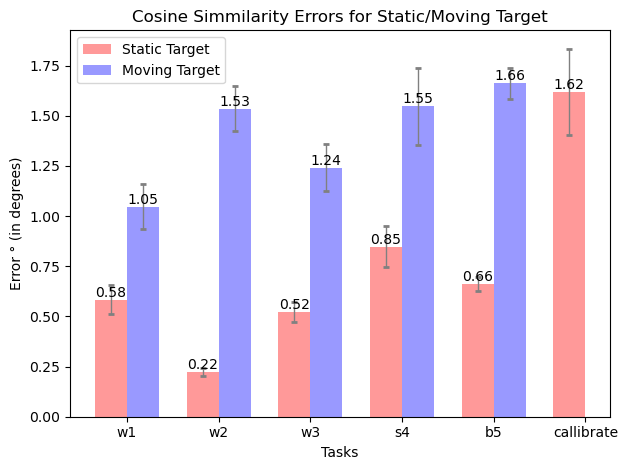

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
from scipy.stats.mstats import winsorize
import scipy.stats
import os

moving_error_df_path = 'recallibrated_data_moving/error_df.csv'
static_error_df_path = 'recallibrated_data_static/error_df.csv'

if not (os.path.exists(moving_error_df_path) or os.path.exists(static_error_df_path)):
    exit()

moving_error_df = pd.read_csv(moving_error_df_path, index_col=False)
static_error_df = pd.read_csv(static_error_df_path, index_col=False)
moving_error_df = moving_error_df[['w1_vec', 'w2_vec', 'w3_vec', 's4_vec', 'b5_vec', 'callibrate_vec']]
static_error_df = static_error_df[['w1_vec', 'w2_vec', 'w3_vec', 's4_vec', 'b5_vec', 'callibrate_vec']]
for column in static_error_df:
    winsorize(static_error_df[column], limits=(0.25,0.25), inplace=True)
for column in moving_error_df:
    winsorize(moving_error_df[column], limits=(0.25,0.25), inplace=True)

xvals = range(len(moving_error_df.columns))
labels = [x[:-4] for x in static_error_df.columns]

x = np.arange(len(labels))

y1 = static_error_df.mean()
y1_std = static_error_df.std()/np.sqrt(static_error_df.shape[0])*1.96
y2 = moving_error_df.mean()
y2_std = moving_error_df.std()/np.sqrt(moving_error_df.shape[0])*1.96

opacity = 0.4
bar_width = 0.35

plt.xlabel('Tasks')
plt.ylabel('Error ° (in degrees)')

plt.xticks(range(len(y1)),labels)
bar1 = plt.bar(np.arange(len(y1)) - bar_width/2, y1, bar_width, yerr=y1_std,align='center', alpha=opacity, color='r', label='Static Target', error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
bar2 = plt.bar(np.arange(len(y2)-1) + bar_width/2, y2[:-1], bar_width,yerr=y2_std[:-1], align='center', alpha=opacity, color='b', label='Moving Target',  error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))

# Add counts above the two bar graphs
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.title("Cosine Simmilarity Errors for Static/Moving Target")
plt.legend()
plt.tight_layout()
plt.show()